# Proyek Analisis Data: Bike-sharing-dataset
- **Nama:** Muhammad Fahrurrozi
- **Email:** M.fahrurrozi298@gmail.com
- **ID Dicoding:** fahrurrozi16

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1 : Di kota mana jumlah customer terbanyak pada tahun 2018, dan bagaimana distribusi customer di 5 kota teratas tersebut dibandingkan dengan kota-kota lainnya pada periode yang sama?
- Pertanyaan 2 : Di kota mana jumlah seller paling banyak pada tahun 2018, dan bagaimana distribusi seller di 5 kota teratas tersebut dibandingkan dengan kota-kota lain di periode yang sama?

## Import Semua Packages/Library yang Digunakan

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
!rm -rf /content/E-CommercePublicDataset

In [6]:
!unzip /content/E-commerce-public-dataset.zip

Archive:  /content/E-commerce-public-dataset.zip
  inflating: E-Commerce Public Dataset/customers_dataset.csv  
  inflating: E-Commerce Public Dataset/geolocation_dataset.csv  
 extracting: E-Commerce Public Dataset/New Text Document.txt  
  inflating: E-Commerce Public Dataset/order_items_dataset.csv  
  inflating: E-Commerce Public Dataset/order_payments_dataset.csv  
  inflating: E-Commerce Public Dataset/order_reviews_dataset.csv  
  inflating: E-Commerce Public Dataset/orders_dataset.csv  
  inflating: E-Commerce Public Dataset/product_category_name_translation.csv  
  inflating: E-Commerce Public Dataset/products_dataset.csv  
  inflating: E-Commerce Public Dataset/sellers_dataset.csv  


## Data Wrangling

### Gathering Data

In [7]:
customer_df = pd.read_csv('/content/E-Commerce Public Dataset/customers_dataset.csv')
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [8]:
order_df = pd.read_csv('/content/E-Commerce Public Dataset/orders_dataset.csv')
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
order_items_df = pd.read_csv('/content/E-Commerce Public Dataset/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [10]:
sellers_df = pd.read_csv('/content/E-Commerce Public Dataset/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


### Assessing Data

### Customer df

In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [ ]:
customer_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
print("Jumlah duplikasi: ", customer_df.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### Order_df

In [ ]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
order_df['order_approved_at'] = order_df['order_approved_at'].ffill()

In [ ]:
order_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [ ]:
order_df.order_approved_at.value_counts()

In [ ]:
order_df.nunique()

,0
order_id,99441
customer_id,99441
order_status,8
order_purchase_timestamp,98875
order_approved_at,90733
order_delivered_carrier_date,81018
order_delivered_customer_date,95664
order_estimated_delivery_date,459


In [ ]:
print("Jumlah duplikasi: ",order_df.duplicated().sum())
order_df.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


### Seller_df

In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


### Order_items_df

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [ ]:
order_items_df.isna().sum()

,0
order_id,0
order_item_id,0
product_id,0
seller_id,0
shipping_limit_date,0
price,0
freight_value,0


In [ ]:
print("Jumlah duplikasi: ", order_items_df.duplicated().sum())

order_items_df.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


**Insight:**
- xxx
- xxx

### Cleaning Data

### Customer_df

In [ ]:
customer_df.duplicated().sum()

0

In [ ]:
customer_df.isna().sum()

,0
customer_id,0
customer_unique_id,0
customer_zip_code_prefix,0
customer_city,0
customer_state,0


In [ ]:
customer_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


### Order_df

In [ ]:
order_df.duplicated().sum()

0

In [ ]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
datetime_columns = ["order_purchase_timestamp", "order_approved_at","order_delivered_carrier_date","order_delivered_customer_date","order_estimated_delivery_date"]

for column in datetime_columns:
  order_df[column] = pd.to_datetime(order_df[column])

In [ ]:
order_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [ ]:
order_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


### Seller_df

In [ ]:
sellers_df.duplicated().sum()

0

In [ ]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [ ]:
sellers_df.isna().sum()

,0
seller_id,0
seller_zip_code_prefix,0
seller_city,0
seller_state,0


### Order_items_df

In [ ]:
order_items_df.duplicated().sum()

0

In [ ]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


## Exploratory Data Analysis (EDA)

### Penggabungan Dataframe

In [22]:
orders_customers_df = pd.merge(
    left=order_df,
    right=customer_df,
    how="left",
    on="customer_id"
)

In [23]:
order_item_seller_df = pd.merge(
    left=order_items_df,
    right=sellers_df,
    how="left",
    on="seller_id"
)

In [ ]:
all_df = pd.merge(
    left=order_item_seller_df,
    right=orders_customers_df,
    how="left",
    on="order_id"
)
all_df.head()

In [25]:
all_df.to_csv("all_data.csv", index=False)

### Filter Data Tahun 2018

In [27]:
all_df['order_purchase_timestamp'] = pd.to_datetime(all_df['order_purchase_timestamp'])

In [28]:
all_df_2018 = all_df[all_df['order_purchase_timestamp'].dt.year == 2018]

## Visualization & Explanatory Analysis

### Pertanyaan 1: Di kota mana jumlah customer terbanyak pada tahun 2018, dan bagaimana distribusi customer di 5 kota teratas tersebut dibandingkan dengan kota-kota lainnya pada periode yang sama?

### Menghitung Jumlah Customer per Kota di Tahun 2018

In [29]:
unique_customers_2018 = all_df_2018[['customer_unique_id', 'customer_city']].drop_duplicates()

In [30]:
customer_per_city_2018 = unique_customers_2018.groupby('customer_city').size().reset_index(name='total_customers')

In [31]:
customer_per_city_2018.sort_values(by='total_customers', ascending=False, inplace=True)

In [32]:
top_5_cities_customers_2018 = customer_per_city_2018.head(5)

In [33]:
print(top_5_cities_customers_2018)

       customer_city  total_customers
2859       sao paulo             8843
2506  rio de janeiro             3400
368   belo horizonte             1514
451         brasilia             1181
917         curitiba              846


### Visualisasi Distribusi Customer di 5 Kota Teratas

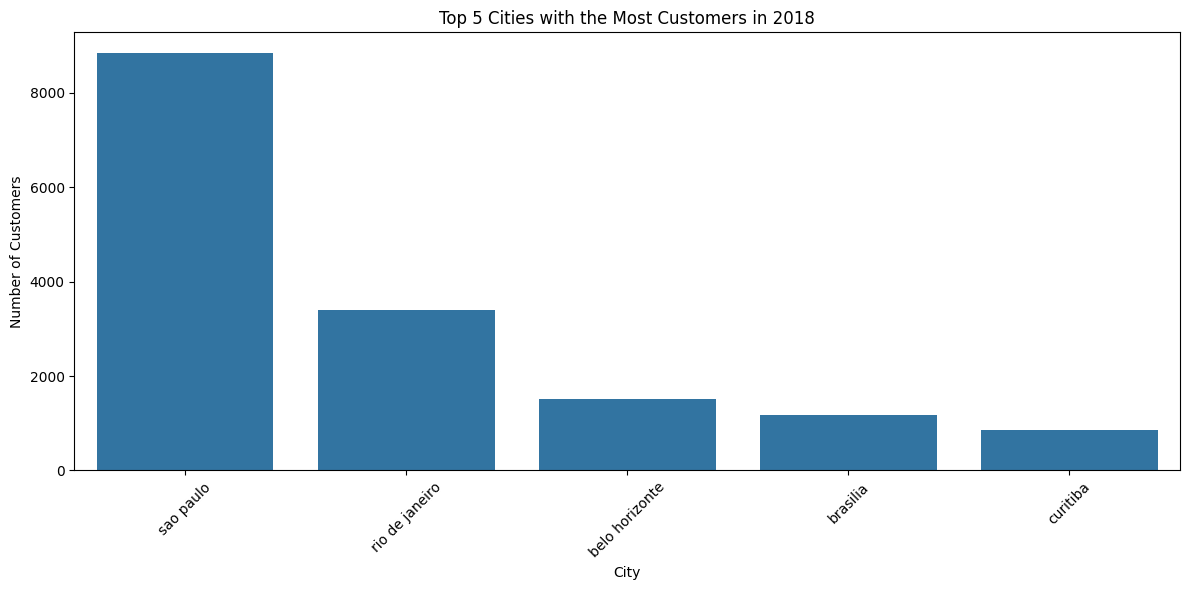

In [34]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=top_5_cities_customers_2018, x='customer_city', y='total_customers', ax=ax)
ax.set_title('Top 5 Cities with the Most Customers in 2018')
ax.set_xlabel('City')
ax.set_ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Membandingkan Distribusi Customer di Kota Lainnya

In [36]:
customer_per_city_2018['category'] = customer_per_city_2018['customer_city'].apply(
    lambda x: x if x in top_5_cities_customers_2018['customer_city'].values else 'Other'
)

In [37]:
customer_category_2018 = customer_per_city_2018.groupby('category')['total_customers'].sum().reset_index()

In [48]:
labels_customer = customer_category_2018['category']
sizes_customer = customer_category_2018['total_customers']
colors_customer = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FF6666', '#FFD700']


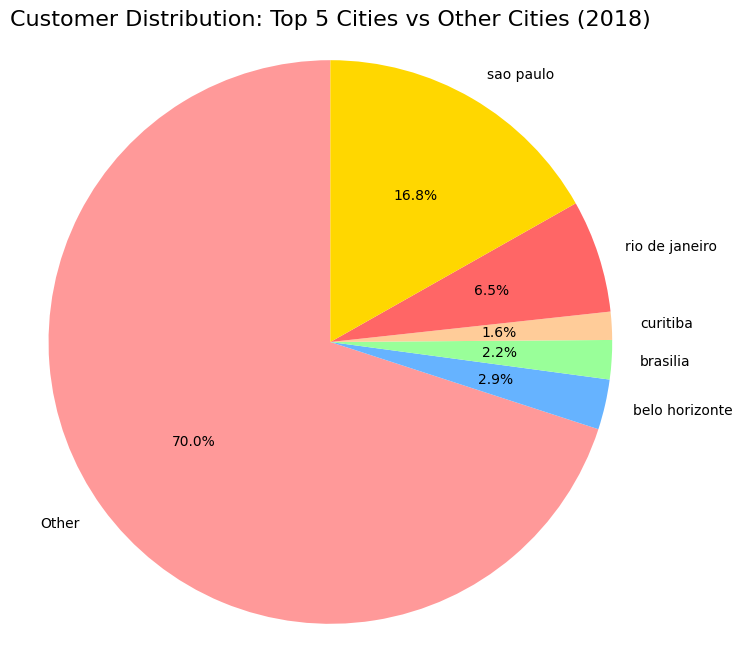

In [49]:
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sizes_customer, labels=labels_customer, autopct='%1.1f%%', startangle=90, colors=colors_customer)
ax1.axis('equal')
plt.title('Customer Distribution: Top 5 Cities vs Other Cities (2018)', fontsize=16)
plt.show()

### Pertanyaan 2: Di kota mana jumlah seller paling banyak pada tahun 2018, dan bagaimana distribusi seller di 5 kota teratas tersebut dibandingkan dengan kota-kota lain di periode yang sama?

### Menghitung Jumlah Seller per Kota di Tahun 2018

In [39]:
unique_sellers_2018 = all_df_2018[['seller_id', 'seller_city']].drop_duplicates()

In [40]:
seller_per_city_2018 = unique_sellers_2018.groupby('seller_city').size().reset_index(name='total_sellers')

In [41]:
seller_per_city_2018.sort_values(by='total_sellers', ascending=False, inplace=True)

In [42]:
top_5_cities_sellers_2018 = seller_per_city_2018.head(5)
print(top_5_cities_sellers_2018)

        seller_city  total_sellers
443       sao paulo            513
132        curitiba             94
383  rio de janeiro             75
50   belo horizonte             47
190        ibitinga             45


### Visualisasi Distribusi Seller di 5 Kota Teratas

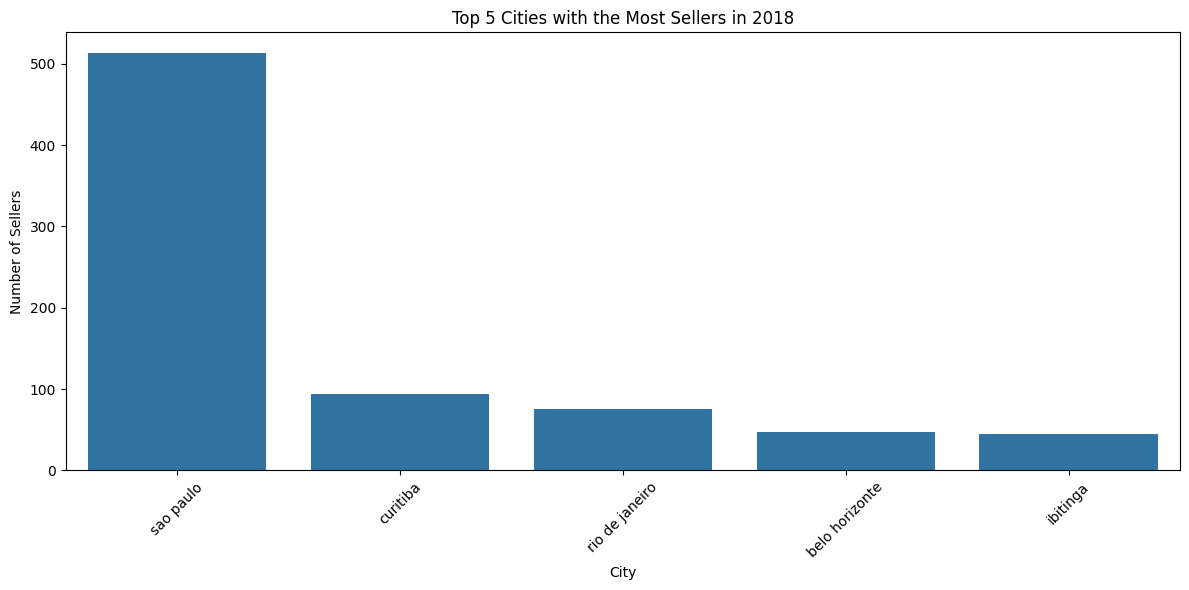

In [43]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.barplot(data=top_5_cities_sellers_2018, x='seller_city', y='total_sellers', ax=ax)
ax.set_title('Top 5 Cities with the Most Sellers in 2018')
ax.set_xlabel('City')
ax.set_ylabel('Number of Sellers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Membandingkan Distribusi Seller di Kota Lainnya

In [44]:
seller_per_city_2018['category'] = seller_per_city_2018['seller_city'].apply(
    lambda x: x if x in top_5_cities_sellers_2018['seller_city'].values else 'Other'
)

In [47]:
seller_category_2018 = seller_per_city_2018.groupby('category')['total_sellers'].sum().reset_index()

print(seller_category_2018)

         category  total_sellers
0           Other           1609
1  belo horizonte             47
2        curitiba             94
3        ibitinga             45
4  rio de janeiro             75
5       sao paulo            513


### Visualisasi Distribusi Seller di 5 Kota Teratas vs Kota Lainnya

In [50]:
labels_seller = seller_category_2018['category']
sizes_seller = seller_category_2018['total_sellers']
colors_seller = ['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FF6666', '#8A2BE2']

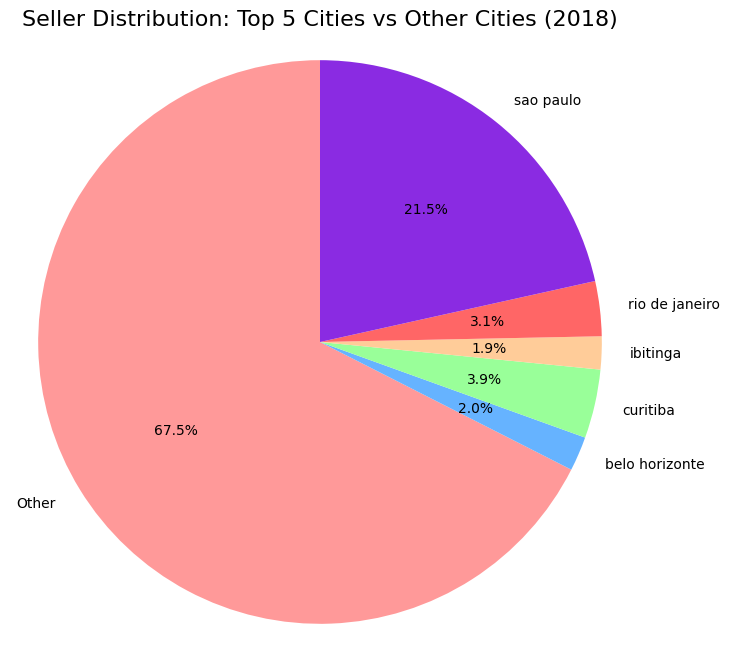

In [52]:
fig2, ax2 = plt.subplots(figsize=(8, 8))
ax2.pie(sizes_seller, labels=labels_seller, autopct='%1.1f%%', startangle=90, colors=colors_seller)
ax2.axis('equal')
plt.title('Seller Distribution: Top 5 Cities vs Other Cities (2018)', fontsize=16)
plt.show()

## Analisis Lanjutan (Opsional)

### Binning untuk Customer

In [53]:
customer_per_city = all_df.groupby('customer_city').agg(total_customers=('customer_unique_id', 'nunique')).reset_index()

In [54]:
top_5_customers_cities = customer_per_city.sort_values(by='total_customers', ascending=False).head(5)

In [55]:
customer_per_city['category'] = customer_per_city['customer_city'].apply(
    lambda x: 'Top 5 Cities' if x in top_5_customers_cities['customer_city'].values else 'Other Cities'
)

In [56]:
customer_category_2018 = customer_per_city.groupby('category').agg(total_customers=('total_customers', 'sum')).reset_index()

print(customer_category_2018)

       category  total_customers
0  Other Cities            67933
1  Top 5 Cities            27606


### Binning untuk Seller

In [57]:
seller_per_city = all_df.groupby('seller_city').agg(total_sellers=('seller_id', 'nunique')).reset_index()

In [58]:
top_5_sellers_cities = seller_per_city.sort_values(by='total_sellers', ascending=False).head(5)


In [59]:
seller_per_city['category'] = seller_per_city['seller_city'].apply(
    lambda x: 'Top 5 Cities' if x in top_5_sellers_cities['seller_city'].values else 'Other Cities'
)

In [60]:
seller_category_2018 = seller_per_city.groupby('category').agg(total_sellers=('total_sellers', 'sum')).reset_index()

print(seller_category_2018)

       category  total_sellers
0  Other Cities           2058
1  Top 5 Cities           1037


## Conclusion

- Conclution pertanyaan 1
Selama 2018 Sao Paulo memiliki jumlah pelanggan yang dominan, namun secara keseluruhan, lebih dari 70% pelanggan berasal dari kota-kota lain, menandakan bahwa pasar tersebar luas di berbagai wilayah dan tidak hanya terkonsentrasi di beberapa kota besar. Meskipun Lima Kota Teratas memberikan kontribusi yang signifikan terhadap jumlah pelanggan, ada peluang besar di kota-kota lain yang secara kumulatif memiliki pangsa pasar lebih besar.
- Conclution pertanyaan 2
Pada tahun 2018 Sao Paulo adalah pusat utama aktivitas penjualan dengan jumlah penjual yang sangat mendominasi jika dibandingkan dengan kota-kota lain. Namun, sekitar 66,5% dari total penjual berasal dari kota-kota lain, yang menunjukkan bahwa aktivitas penjual tersebar secara luas di berbagai daerah, bukan hanya terbatas pada kota-kota besar.